# Homework 12 Assignment 2

# Data

In [1]:
import pandas as pd
import zipfile 
import os
import urllib
from IPython.display import display, HTML
import geopandas as gp
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as pl
import scipy.cluster as scp
from sklearn.cluster import AgglomerativeClustering

% matplotlib inline

In [2]:
#environmental variable
#create the env variable since previous doesn't work
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/sjf374/PUI2018/PUIdata


In [3]:
def zips(filename):
    print ("Downloading")
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + filename + ".zip"):
        print ("no zip in puidata")
        if not os.path.isfile(filename + ".zip"):
            print ("no zip in current folder")
            urllib.request.urlretrieve('https://github.com/fedhere/PUI2018_fb55/raw/master/HW12_fb55/' + filename + '.zip', filename + '.zip')                  

        os.system("mv " + filename + ".zip " + os.getenv("PUIDATA"))
        print ("moving zipped file")
    
    zf = zipfile.ZipFile(os.getenv("PUIDATA") + "/" + filename + ".zip")
    df = pd.read_csv(zf.open(filename + ".zip".replace('.zip','.txt')))

    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + filename + ".zip"):
        print ("WARNING!!! something is wrong: the %s file is not there!" % (x))

    else:
        print ("file in place, you can continue")
    
    return df

In [4]:
years = [x for x in range(94,100)] + [x for x in range(15)]

In [5]:
years

[94, 95, 96, 97, 98, 99, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [6]:
for x in years:  
    # https://stackoverflow.com/questions/3505831/in-python-how-do-i-convert-a-single-digit-number-into-a-double-digits-string
    print ("{0:0=2d}".format(x))

94
95
96
97
98
99
00
01
02
03
04
05
06
07
08
09
10
11
12
13
14


In [7]:
i = 0
for x in years:  
    # https://stackoverflow.com/questions/3505831/in-python-how-do-i-convert-a-single-digit-number-into-a-double-digits-string
    x = "{0:0=2d}".format(x)
    filename = 'zbp' + x + 'totals'
    current_df = zips(filename)
    # lowercase columns
    current_df.columns = [x.lower() for x in current_df.columns]
    # filtering columns
    current_df = current_df[['zip', 'est']]
    #renaming columns to account for different years
    current_df.columns = ['zip', x]
    current_df['zip'] = current_df['zip'].astype(int).astype(str)
    # if first file than no need to merge
    if i == 0:
        master_df = current_df
    #second file and forward merge on zip
    else:
        master_df = master_df.merge(current_df, on='zip', how='outer')
    i=+1

Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue
Downloading
file in place, you can continue


In [8]:
master_df.head()

,zip,94,95,96,97,98,99,00,01,02,...,05,06,07,08,09,10,11,12,13,14
0,1001,439.0,439.0,433.0,457.0,444.0,469.0,493.0,490.0,490.0,...,509.0,509.0,503.0,477.0,458.0,448.0,436.0,453.0,439.0,458.0
1,1002,450.0,467.0,487.0,500.0,490.0,558.0,563.0,587.0,566.0,...,589.0,582.0,596.0,584.0,571.0,570.0,558.0,572.0,572.0,560.0
2,1003,10.0,10.0,13.0,15.0,14.0,13.0,13.0,13.0,15.0,...,12.0,12.0,16.0,17.0,16.0,16.0,16.0,15.0,15.0,18.0
3,1004,47.0,48.0,47.0,41.0,31.0,35.0,48.0,37.0,23.0,...,31.0,30.0,20.0,18.0,18.0,21.0,19.0,16.0,16.0,13.0
4,1005,92.0,95.0,101.0,104.0,95.0,82.0,86.0,90.0,94.0,...,94.0,98.0,106.0,97.0,87.0,96.0,91.0,94.0,97.0,97.0


In [9]:
master_df.shape

(42672, 22)

In [10]:
#going with zip code method instead

# nyny = ['NEW YORK, NY',     
# 'BROOKLYN, NY', 
# 'BRONX, NY', 
# 'JAMAICA, NY', 
# 'STATEN ISLAND, NY', 
# 'FLUSHING, NY', 
# 'FAR ROCKAWAY, NY', 
# 'ASTORIA, NY']

#filter down the data to the 9 places listed above
# for k in bd_dfs:
#     bd_dfs[k] = bd_dfs[k][[x in nyny for x in bd_dfs[k]['name']]]

#double check that there are the right amount of zips
#bd_dfs['zbp01totals'][[x in nyny for x in bd_dfs['zbp01totals']['name']]]['zip'].unique()


# Data cleaning

In [11]:
# https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip
# Get the zipcodes shapefile
url = "https://data.cityofnewyork.us/api/views/i8iw-xf4u/files/YObIR0MbpUVA0EpQzZSq5x55FzKGM2ejSeahdvjqR20?filename=ZIP_CODE_040114.zip"
urllib.request.urlretrieve(url, "ZIP_CODE_040114.zip")
!unzip -d $PUIDATA ZIP_CODE_040114.zip

Archive:  ZIP_CODE_040114.zip
replace /nfshome/sjf374/PUI2018/PUIdata/ZIP_CODE_040114.shx? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [12]:
nyczipsshp = gp.read_file(os.getenv("PUIDATA") + "/ZIP_CODE_040114.shp")
#nyczipsshp.plot()
#nyczipsshp.drop_duplicates("ZIPCODE").plot()
#nyczipsshp
print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

ZIPCODES: 248 POLYGONS: 263 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 263


In [13]:
zipcodes = list(nyczipsshp['ZIPCODE'].unique())

In [14]:
len(zipcodes)

248

In [15]:
master_df['zip'] = master_df['zip'].astype(int).astype(str)

In [16]:
csb = master_df[[x in zipcodes for x in master_df['zip']]]

In [17]:
csb.head()

,zip,94,95,96,97,98,99,00,01,02,...,05,06,07,08,09,10,11,12,13,14
2966,10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,...,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
2967,10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,...,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
2968,10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,...,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
2969,10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,...,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
2970,10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,...,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


In [18]:
csb.shape

(245, 22)

In [19]:
cleancsb = csb.dropna()

In [20]:
cleancsb.shape

(230, 22)

In [21]:
cleancsb.reset_index(drop=True, inplace=True)

In [22]:
pd.set_option("display.max_columns",30)

In [23]:
cleancsb.head()

,zip,94,95,96,97,98,99,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14
0,10001,6999.0,7088.0,7075.0,7154.0,7254.0,7233.0,7317.0,7188.0,7141.0,7084.0,7370.0,7312.0,7415.0,7549.0,7472.0,7305.0,7241.0,7227.0,7235.0,7273.0,7369.0
1,10002,1784.0,1819.0,1919.0,2049.0,2003.0,2085.0,2277.0,2543.0,2269.0,2402.0,2551.0,2682.0,2686.0,2685.0,2691.0,2775.0,2872.0,2912.0,2954.0,2988.0,2972.0
2,10003,3256.0,3377.0,3417.0,3535.0,3649.0,3659.0,3683.0,3602.0,3616.0,3704.0,3776.0,3867.0,3909.0,4049.0,4071.0,4099.0,4113.0,4159.0,4214.0,4277.0,4333.0
3,10004,1115.0,1124.0,1133.0,1173.0,1176.0,1233.0,1294.0,1247.0,1253.0,1252.0,1283.0,1260.0,1311.0,1370.0,1376.0,1379.0,1398.0,1404.0,1442.0,1479.0,1554.0
4,10005,1076.0,1109.0,1216.0,1227.0,1270.0,1242.0,1287.0,1249.0,1244.0,1200.0,1226.0,1214.0,1259.0,1273.0,1291.0,1274.0,1266.0,1301.0,1273.0,1296.0,1321.0


In [24]:
# TODO visit differences in row counts between professor and mine

In [25]:
# # 20 years of data and 263 zipcodes
# cbs.shape

In [26]:
# #cleaning all missing values
# cleancsb.shape

In [27]:
#then the standardization will look like:
vals = ((cleancsb.iloc[:,1:].T - cleancsb.iloc[:,1:].mean(1)) / cleancsb.iloc[:,1:].std(1)).T

In [28]:
vals.mean(axis=1)

0     -9.251859e-16
1      2.220446e-16
2     -5.286776e-17
3     -1.691768e-16
4     -1.776357e-15
5      1.057355e-17
6     -5.498247e-16
7      1.586033e-16
8      2.960595e-16
9     -1.173664e-15
10     1.020348e-15
11     1.928021e-16
12    -4.335157e-16
13    -1.875484e-15
14    -8.353107e-16
15     1.374562e-15
16     7.137148e-16
17     6.396999e-16
18     3.277801e-16
19     1.215959e-15
20     1.533165e-15
21     0.000000e+00
22    -6.344132e-17
23     9.516197e-17
24    -2.326182e-16
25     9.529414e-16
26    -8.458842e-17
27    -2.326182e-16
28     2.749124e-16
29    -3.172066e-16
           ...     
200   -6.344132e-17
201   -4.758099e-16
202   -3.172066e-16
203    2.008975e-16
204   -1.839798e-15
205   -6.132661e-16
206   -7.718693e-16
207    4.229421e-17
208    8.035900e-16
209   -5.286776e-17
210    5.286776e-17
211    3.383537e-16
212    8.670313e-16
213   -1.691768e-16
214   -2.114711e-17
215   -3.172066e-16
216   -5.392512e-16
217    4.440892e-16
218    3.674310e-16


In [29]:
vals.mean(axis=1).shape

(230,)

In [30]:
vals.std(axis=1)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
5      1.0
6      1.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     1.0
13     1.0
14     1.0
15     1.0
16     1.0
17     1.0
18     1.0
19     1.0
20     1.0
21     1.0
22     1.0
23     1.0
24     1.0
25     1.0
26     1.0
27     1.0
28     1.0
29     1.0
      ... 
200    1.0
201    1.0
202    1.0
203    1.0
204    1.0
205    1.0
206    1.0
207    1.0
208    1.0
209    1.0
210    1.0
211    1.0
212    1.0
213    1.0
214    1.0
215    1.0
216    1.0
217    1.0
218    1.0
219    1.0
220    1.0
221    1.0
222    1.0
223    1.0
224    1.0
225    1.0
226    1.0
227    1.0
228    1.0
229    1.0
dtype: float64

In [31]:
vals.std(axis=1).shape

(230,)

vals.mean(axis=1) should return 0 (or something very small) everywhere

vals.mean(axis=1).shape should be (260,)

vals.std(axis=1) should return 1 everywhere

vals.std(axis=1).shape

In [32]:
#cluster with kmeans
km = KMeans(n_clusters=5, random_state=666).fit(vals)


In [33]:
#each observation in the km object has a label: 
#that is the cluster assigned to that observation
km.labels_.shape

(230,)

In [34]:
km.labels_

array([0, 0, 4, 4, 0, 2, 3, 4, 3, 0, 0, 2, 0, 3, 2, 4, 2, 0, 2, 2, 0, 0, 0,
       4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 3, 4, 3, 4, 0, 0, 3, 4, 0, 3, 3, 2, 1,
       1, 2, 1, 2, 2, 0, 4, 2, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 3, 2, 2,
       4, 1, 2, 3, 4, 2, 2, 4, 2, 2, 1, 2, 2, 3, 4, 3, 0, 2, 0, 2, 0, 4, 4,
       4, 0, 4, 4, 0, 4, 0, 1, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       3, 4, 0, 4, 4, 4, 1, 1, 4, 0, 4, 4, 4, 0, 1, 4, 0, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 1, 4, 4, 0, 4, 4, 4, 0, 4, 4, 0, 4, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 3, 0, 4,
       4, 4, 4, 4, 4, 4, 0, 1, 4, 4, 0, 0, 0, 0, 4, 4, 4, 3, 4, 4, 4, 4, 0], dtype=int32)

In [35]:
vals['zip'] = cleancsb['zip']

In [36]:
vals['kmlabels'] = km.labels_

In [37]:
vals.head()

,94,95,96,97,98,99,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,zip,kmlabels
0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,0.853243,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,10001,0
1,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,0.195965,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,10002,0
2,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,-0.162325,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,10003,4
3,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,-0.123265,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,10004,4
4,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,-0.294917,-0.496872,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,10005,0


### The map of the clusters may look something like this

In [38]:
full_years = [x for x in range(1994, 2014+1)]


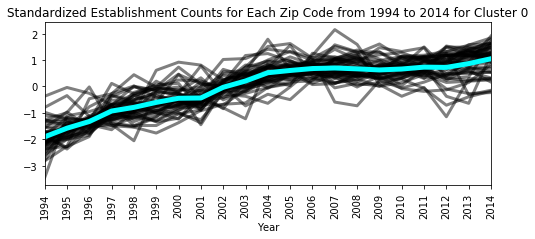

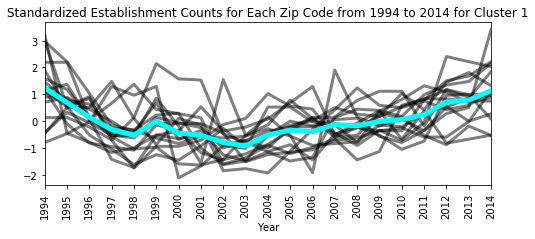

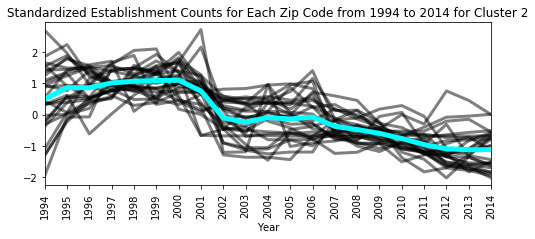

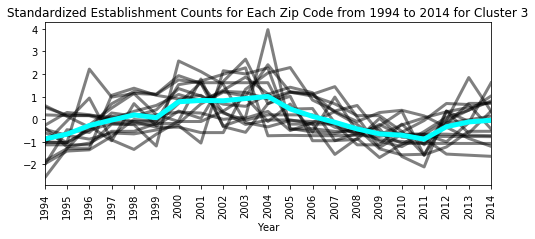

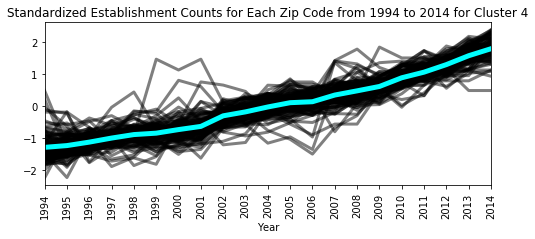

In [39]:
for x in range(5):
    vals[vals['kmlabels'] == x].iloc[:,:-2].T.plot(figsize=(8,3), legend=False, c='black', alpha=0.5, linewidth=3)
    vals[vals['kmlabels'] == x].iloc[:,:-2].mean().plot(c='cyan', linewidth=5)
    pl.title('Standardized Establishment Counts for Each Zip Code from 1994 to 2014 for Cluster %s' % str(x))
    pl.xlabel('Year')
    pl.xticks(np.arange(len(full_years)), full_years, rotation='vertical')
    pl.show()
    
    



Figure 1: we can see here that the kmeans clustering worked quite well as each cluster follows the same trend across the years. It seems there could still be improvements to be made as cluster 4 and 1 have an interesting spike between 1998 and 2001. 

In [40]:
kmean_geo = nyczipsshp[['ZIPCODE', 'geometry']].merge(vals, left_on='ZIPCODE', right_on='zip', how='left')

In [41]:
kmean_geo.dropna(inplace=True)

In [42]:
kmean_geo['kmlabels'] = kmean_geo['kmlabels'].astype(int).astype(str)

Text(0.5,1,'Clusters of Similar Zip Codes by Standardized Establishment Counts Over Time')

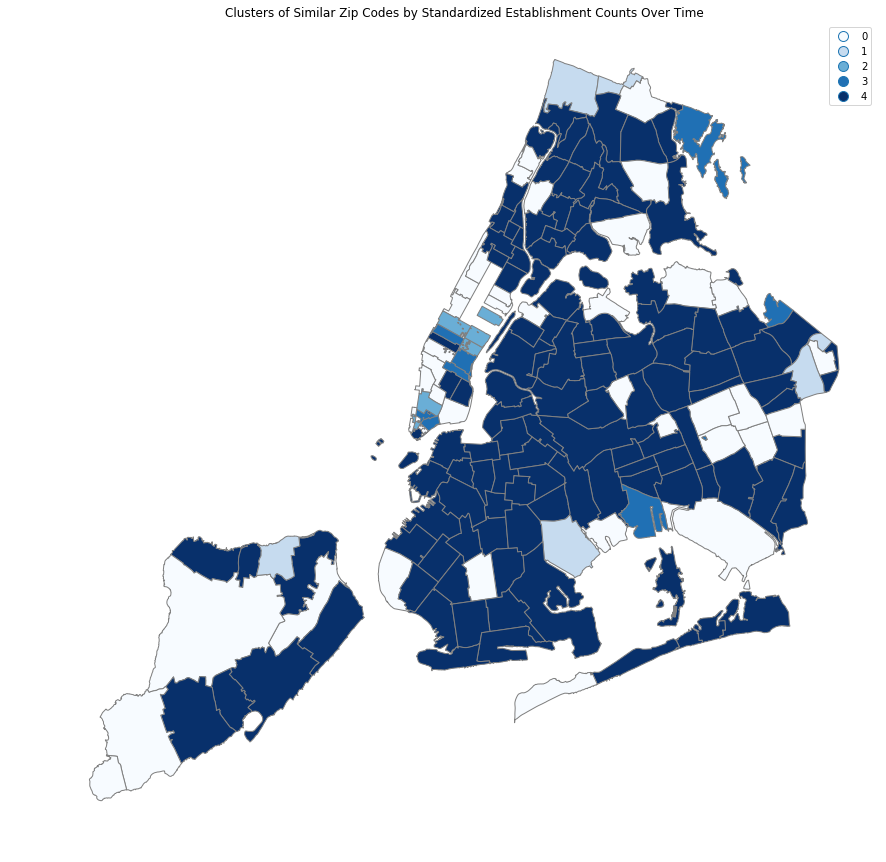

In [43]:
kmean_geo.plot(column='kmlabels', cmap='Blues', legend=True, k=5, edgecolor='grey', figsize=(15,15))
pl.axis('off')
pl.title('Clusters of Similar Zip Codes by Standardized Establishment Counts Over Time')

#### figure 2: K means Clustering of zipcodes by similarity in time series of counts of establishments over time. Cluster 4 is paticularly of interest here as it encompassed many of the outer boroughs. When looking at the line graph above, it can be seen that all of these areas had growth over the course of 20 years.

# If you want to use agglomerative clustering

In [44]:
vals_only = vals.iloc[:,:-2]

In [45]:
agc = AgglomerativeClustering(n_clusters=5, linkage='average').fit(vals_only)
labelsag = agc.labels_
centroidsag = np.zeros((5, vals_only.shape[1]))



In [46]:
labelsag

array([2, 2, 2, 2, 2, 3, 0, 2, 0, 2, 2, 4, 2, 0, 3, 2, 3, 0, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2, 2, 0, 2, 0, 0, 0, 3, 1,
       1, 3, 4, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3, 3, 4, 2, 4, 1, 0, 3, 3,
       2, 4, 3, 0, 2, 4, 3, 2, 3, 3, 2, 3, 3, 0, 2, 0, 2, 3, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2])

In [47]:
vals_agg = pd.concat([vals_only, vals[['zip']]], axis=1)

In [48]:
vals_agg['agg_labels'] = labelsag

In [49]:
vals_agg.head()

,94,95,96,97,98,99,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,zip,agg_labels
0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,0.853243,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,10001,2
1,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,0.195965,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,10002,2
2,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,-0.162325,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,10003,2
3,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,-0.123265,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,10004,2
4,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,-0.294917,-0.496872,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,10005,2


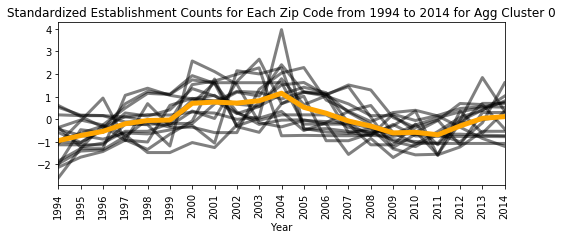

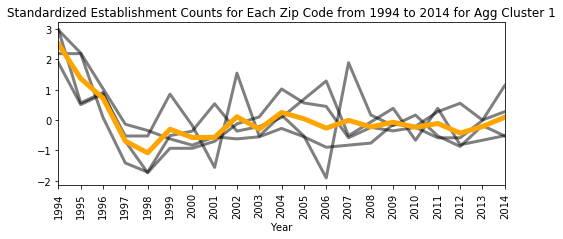

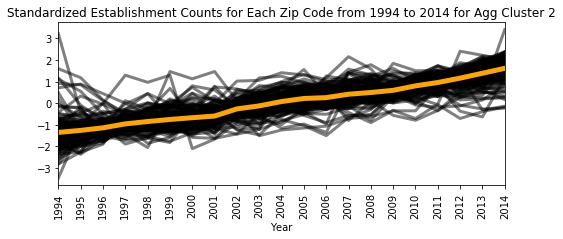

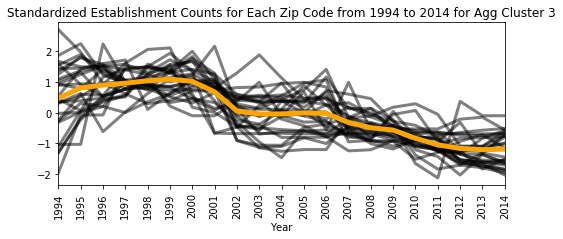

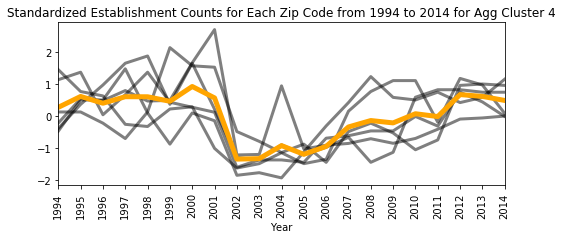

In [50]:
for x in range(5):
    vals_agg[vals_agg['agg_labels'] == x].iloc[:,:-2].T.plot(figsize=(8,3), legend=False, c='black', alpha=0.5, linewidth=3)
    vals_agg[vals_agg['agg_labels'] == x].iloc[:,:-2].mean().plot(c='orange', linewidth=5)
    pl.title('Standardized Establishment Counts for Each Zip Code from 1994 to 2014 for Agg Cluster %s' % str(x))
    pl.xlabel('Year')
    pl.xticks(np.arange(len(full_years)), full_years, rotation='vertical')
    pl.show()

Figure 3: Interesting that there are different outcomes in terms of count of zip codes included per cluster. 

In [51]:
kmean_geo_agg = nyczipsshp[['ZIPCODE', 'geometry']].merge(vals_agg, left_on='ZIPCODE', right_on='zip', how='left')

In [52]:
kmean_geo_agg.dropna(inplace=True)

In [53]:
kmean_geo_agg['agg_labels'] = kmean_geo_agg['agg_labels'].astype(int).astype(str)

Text(0.5,1,'Clusters of Similar Zip Codes by Standardized Establishment Counts Over Time')

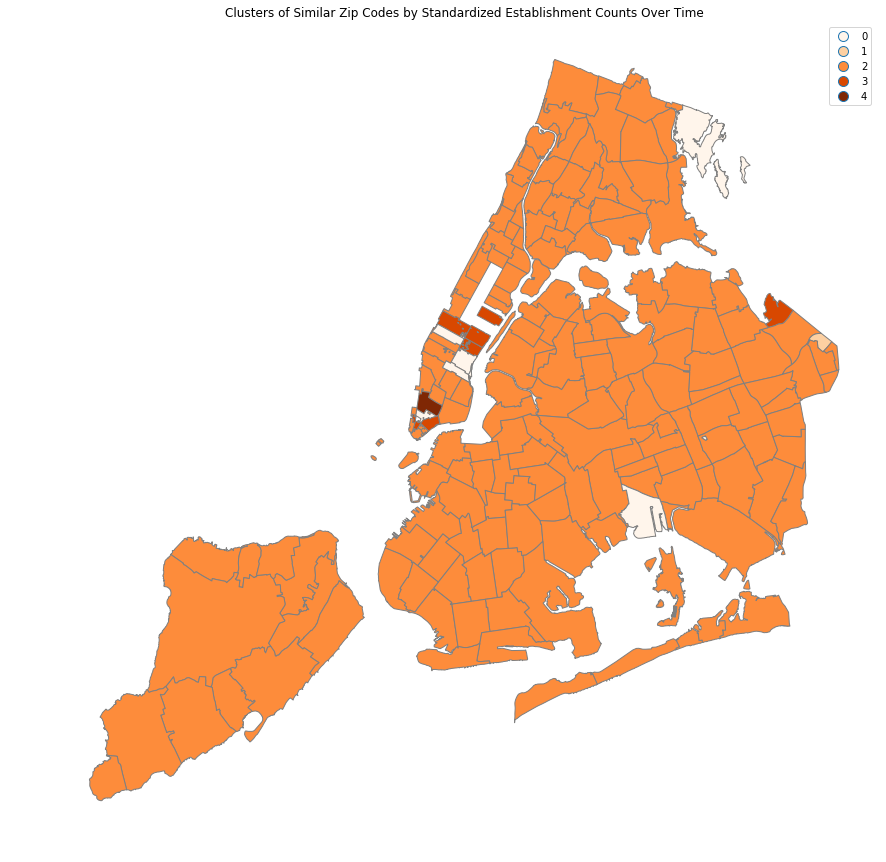

In [54]:
kmean_geo_agg.plot(column='agg_labels', cmap='Oranges', legend=True, k=5, edgecolor='grey', figsize=(15,15))
pl.axis('off')
pl.title('Clusters of Similar Zip Codes by Standardized Establishment Counts Over Time')

Figure 4: as opposed to the previous map, Here we see a lot more homogoneous assignment.Since agglomerative clustering is a bottom up approach it is looking to pair clusters together and find more homogeneity. We also see that cluster 2 (the cluster with the most zip codes) is the only one that has a clear increase in slope. The others have more of a down or flat trend. 

Further comparison of the two models: it does seem as though the midtown areas are still grouped together in a downward trend. In this area there has been a growth of larger stores, which maybe could account for the downward trend. Though it is still a growth, a large establishment is still counted as 1 even though it takes up more space. 

I believe the first model would be better if looking for specificity amoungst different trends in increasing establishments over time. 

The second model could be good to make some sort of "point" I guess. a point about an increasing economy in New york. Though there is not much to act on, considering it is such a blanket statement with out much detail amoungst them . 

In [55]:
### seeing how it looks again with more clusters. 

In [56]:
vals_only = vals.iloc[:,:-2]

In [57]:
agc = AgglomerativeClustering(n_clusters=8, linkage='average').fit(vals_only)
labelsag = agc.labels_
centroidsag = np.zeros((8, vals_only.shape[1]))



In [58]:
labelsag

array([3, 3, 3, 3, 3, 0, 2, 3, 2, 3, 3, 4, 3, 2, 0, 3, 0, 2, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 1, 3, 1, 2, 1, 0, 5,
       5, 0, 4, 0, 0, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0, 0, 4, 3, 4, 5, 2, 0, 0,
       3, 4, 0, 2, 3, 4, 0, 3, 0, 0, 3, 0, 0, 2, 3, 2, 3, 0, 3, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3])

In [59]:
vals_agg = pd.concat([vals_only, vals[['zip']]], axis=1)

In [60]:
vals_agg['agg_labels'] = labelsag

In [61]:
vals_agg.head()

,94,95,96,97,98,99,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,zip,agg_labels
0,-1.839191,-1.193297,-1.287641,-0.714319,0.011404,-0.140998,0.468610,-0.467573,-0.808663,-1.222326,0.853243,0.432324,1.179819,2.152288,1.593481,0.381523,-0.082940,-0.184541,-0.126483,0.149292,0.845986,10001,3
1,-1.713540,-1.626405,-1.377447,-1.053802,-1.168323,-0.964178,-0.486179,0.176049,-0.506095,-0.174982,0.195965,0.522100,0.532058,0.529569,0.544506,0.753631,0.995120,1.094703,1.199265,1.283911,1.244077,10002,3
2,-1.820497,-1.434653,-1.307101,-0.930824,-0.567301,-0.535414,-0.458882,-0.717175,-0.672532,-0.391918,-0.162325,0.127855,0.261785,0.708216,0.778369,0.867655,0.912298,1.058983,1.234367,1.435260,1.613833,10003,3
3,-1.512649,-1.438217,-1.363786,-1.032980,-1.008170,-0.536772,-0.032293,-0.420990,-0.371369,-0.379639,-0.123265,-0.313478,0.108300,0.596238,0.645859,0.670669,0.827802,0.877423,1.191688,1.497684,2.117945,10004,3
4,-2.819347,-2.263972,-0.463213,-0.278088,0.445582,-0.025645,0.731684,0.092162,0.008014,-0.732485,-0.294917,-0.496872,0.260457,0.496070,0.799002,0.512900,0.378264,0.967297,0.496070,0.883150,1.303888,10005,3


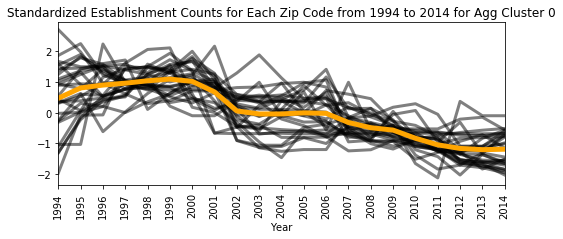

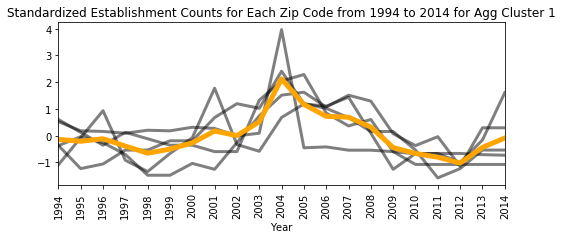

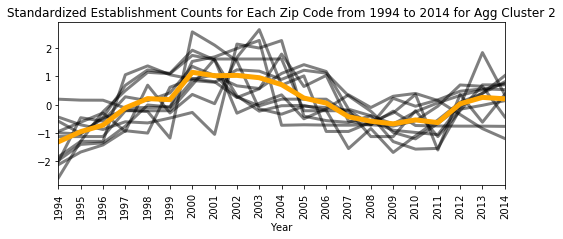

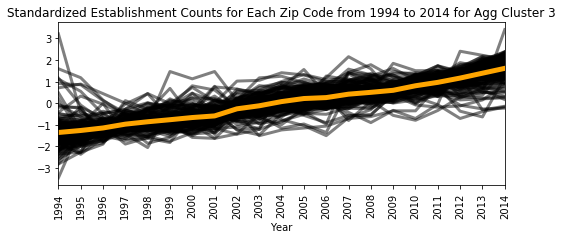

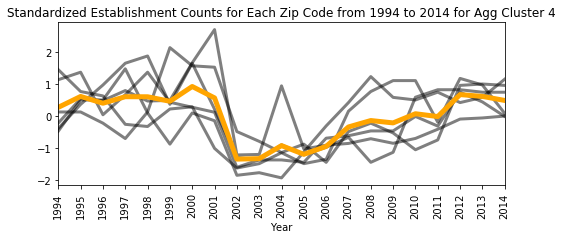

In [62]:
for x in range(5):
    vals_agg[vals_agg['agg_labels'] == x].iloc[:,:-2].T.plot(figsize=(8,3), legend=False, c='black', alpha=0.5, linewidth=3)
    vals_agg[vals_agg['agg_labels'] == x].iloc[:,:-2].mean().plot(c='orange', linewidth=5)
    pl.title('Standardized Establishment Counts for Each Zip Code from 1994 to 2014 for Agg Cluster %s' % str(x))
    pl.xlabel('Year')
    pl.xticks(np.arange(len(full_years)), full_years, rotation='vertical')
    pl.show()

Figure 3: Interesting that there are different outcomes in terms of count of zip codes included per cluster. 

In [63]:
kmean_geo_agg = nyczipsshp[['ZIPCODE', 'geometry']].merge(vals_agg, left_on='ZIPCODE', right_on='zip', how='left')

In [64]:
kmean_geo_agg.dropna(inplace=True)

In [65]:
kmean_geo_agg['agg_labels'] = kmean_geo_agg['agg_labels'].astype(int).astype(str)

Text(0.5,1,'Clusters of Similar Zip Codes by Standardized Establishment Counts Over Time')

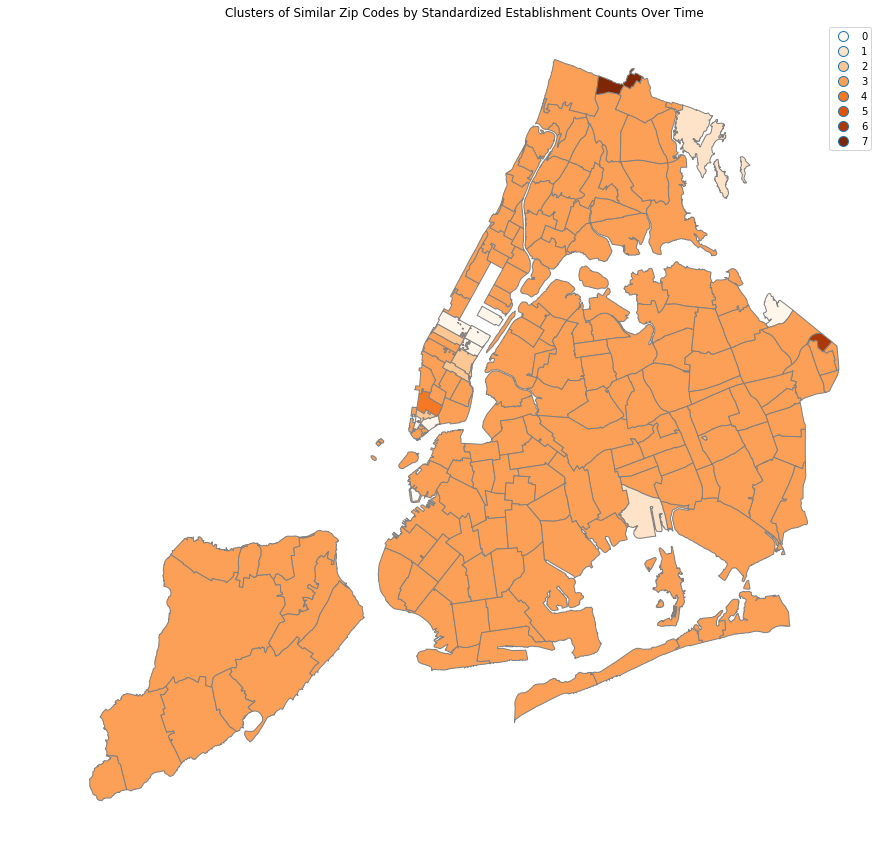

In [66]:
kmean_geo_agg.plot(column='agg_labels', cmap='Oranges', legend=True, k=5, edgecolor='grey', figsize=(15,15))
pl.axis('off')
pl.title('Clusters of Similar Zip Codes by Standardized Establishment Counts Over Time')

Figure 5: adding more clusters did not improve the specificity as expected, due to the bottom up approach

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

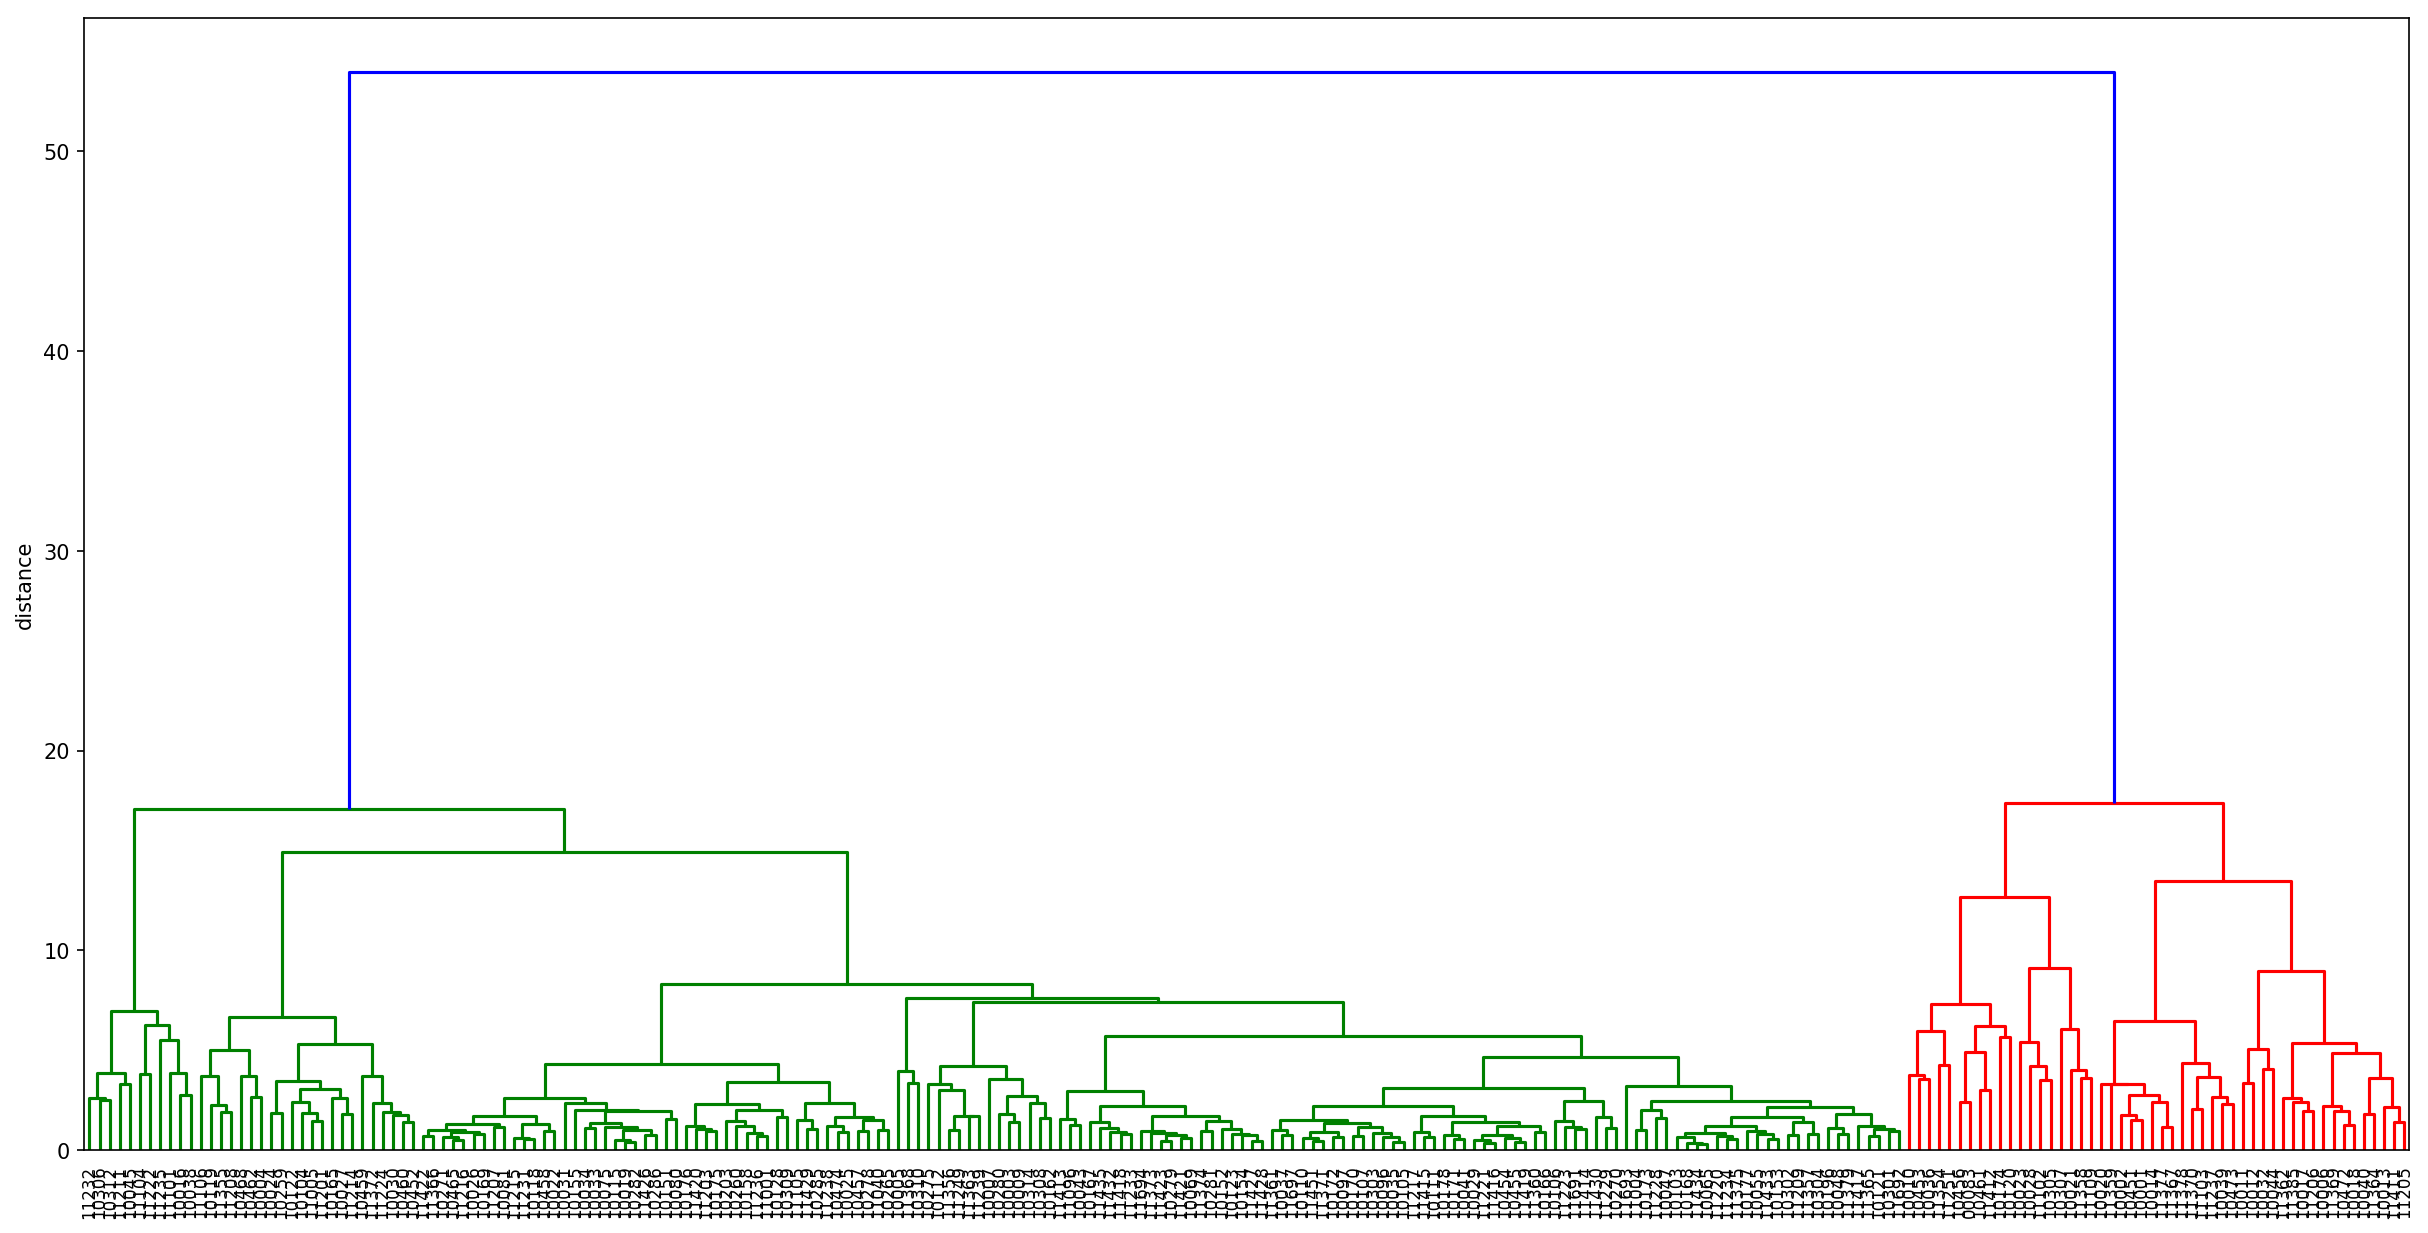

In [67]:
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals.iloc[:,:-2], method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


Figure 6:  wanted to test out the hierarchy visualization.Its once again a bottom up approach and shows how the red vs green clusters are found. one with smaller variance than the other. 